In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Confidence INtervals

In [ ]:
# This time we have a sample, but no population data!
births = Table.read_table('baby.csv')
births.show(5)

How can we see a distribution of maternal ages?

<details>
<summary>Solution</summary>
  births.hist('Maternal Age')
</details>  

What is the mean age?

In [ ]:
mean_age = ...
mean_age

Now let's use bootstraping to find samples means

<details>
<summary>Solution</summary>
  np.mean(births.sample().column('Maternal Age'))
</details>  

In [ ]:
def one_bootstrap_mean():
    return ...

Let's compute 1k bootstrapped samples

In [ ]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

In [ ]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');

## Is this technique reliable?


Repeat this process 100 times and keep track of how many times the true population parameter was indeed in this interval

*Run this before discussing it because it will take about a minute to run*

In [ ]:
%%time
# This will take a while to run
intervals = Table().with_columns('Lower', make_array(), 'Upper', make_array())

for i in np.arange(100):
    sample_from_pop = births.sample(300, with_replacement=False)
    means = make_array()
    
    for j in np.arange(1000):
        resample = sample_from_pop.sample(with_replacement=True)
        mean = np.average(resample.column('Maternal Age'))
        means = np.append(means, mean)
        
    interval = make_array(
                percentile(2.5, means), 
                percentile(97.5, means))
    
    intervals.append(interval)

Now let's check how many times our intervals included the true parameter

In [ ]:
true_mean = np.average(births.column('Maternal Age'))
intervals.where('Lower', are.not_above(true_mean)).where('Upper', are.not_below(true_mean)).num_rows

In [ ]:
true_mean, intervals

**Question:** How many times was the true mean below our lower bound?

<details>
<summary>Solution</summary>
    intervals.where('Lower', are.above(true_mean))
</details>   

**Question:** How many times was the true mean above our upper bound?

<details>
<summary>Solution</summary>
    intervals.where('Upper', are.below(true_mean))
</details>   

(back to slides)
# Averages/Means

In [2]:
values = make_array(2, 3, 3, 9)
values

array([2, 3, 3, 9])

#### Different ways to compute the average

Sum of the values divided by the number of values
<details>
<summary>Solution</summary>
  sum(values)/len(values)
</details>

In [3]:
sum(values) / len(values)

4.25

In [4]:
np.mean(values)

4.25

Numpy methods

<details>
<summary>Solution</summary>
  np.mean(values), np.average(values)
</details>

In [ ]:
np.mean(values), np.average(values)

In [5]:
values

array([2, 3, 3, 9])

In [6]:
2*.25 + 3*.5 + 9*.25

4.25

In [8]:
2*.25 + 3*.25 + 3*.25 + 9*.25

4.25

Multiply each value by a weight
<details>
<summary>Solution</summary>
  2*(1/4) + 3*(2/4) + 9*(1/4)
</details>

In [ ]:
(2 * 1/4) + (3 * 1/2) + (9 * 1/4)

(back to slides)
#### Averages & Histograms

In [9]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


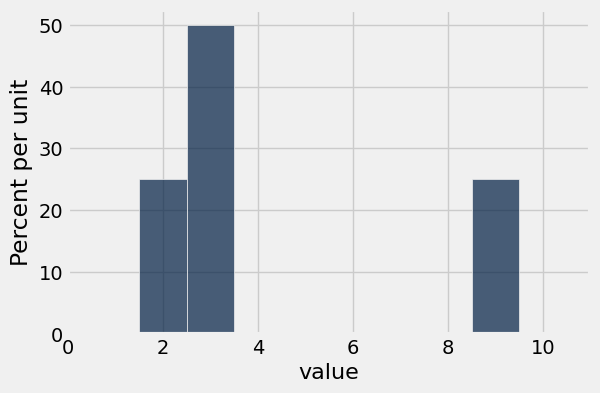

In [10]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

**Question:** Where is the average in the figure above?

**Question:** What if we add more values but keep the proportions the same?

4.25

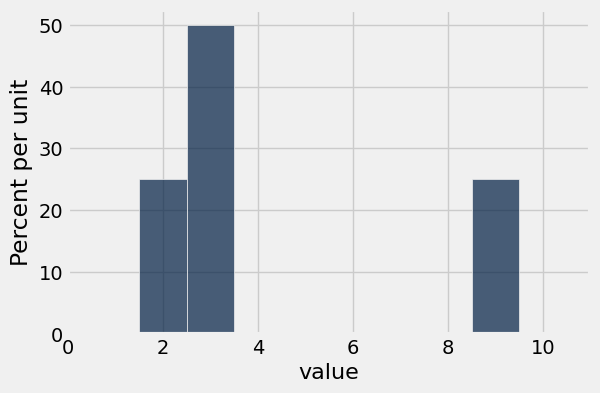

In [11]:
# Make array of 10 2s, 20 3s, and 10 9s

new_values = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)
Table().with_column('value', new_values).hist(bins = bins_for_display)
np.average(new_values)

(back to slides)
#### Which is bigger, mean or median?

(80, 79.065346534653472)

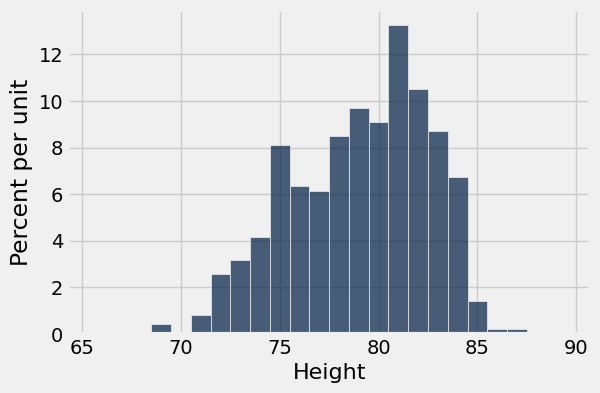

In [13]:
nba = Table.read_table('nba2013.csv')
nba
heights = nba.column('Height')
percentile(50, heights), np.mean(heights)

nba.hist('Height', bins=np.arange(65.5, 90.5))
percentile(50, heights), np.mean(heights)

(continue here even though we didnt cover this in slides, the slides will be review)
# Standard Deviation

In [14]:
values = make_array(2, 3, 3, 9)
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


**Question:** How far is each example from the mean?
    
<details>
<summary>Solution</summary>
  Compute the average value then subtract that by each value
</details>

<details>
    <summary> code</summary>
mean_value = np.mean(values) # Don't forget about step 1
deviations = values - mean_value # deviations from average, aka distance of each element from the average
sd_table = sd_table.with_column('Deviation', deviations)
sd_table
</details>

In [15]:
mean_value = np.mean(values) # Don't forget about step 1
deviations = values - mean_value # deviations from average, aka distance of each element from the average
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


**Question**: What is the typical deviation? What do we use to compute the "typical"?
<details>
<summary>Solution</summary>
  average. Let's take the average of the deviations
</details>

In [17]:
np.mean(sd_table.column('Deviation'))

0.0

**Question**: Average is the sum divided by the number of examples. What is the sum of these deviations?
<details>
<summary>Solution</summary>
  sum(deviations)
</details>

In [19]:
sum(sd_table.column('Deviation'))

0.0

We care about the size of the deviation.

We've use `abs()` to find the size before, but here we will take the square value of the deviations

In [20]:
deviations ** 2

array([  5.0625,   1.5625,   1.5625,  22.5625])

In [21]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


Variance of the data is the average of these squared deviations


In [22]:
variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

Standard Deviation (SD) is the square root of the variance

The square root gets us back to the same units as in the data

In [23]:
sd = variance ** 0.5
sd

2.7726341266023544

#### Computing std in numpy 

In [24]:
np.std(values), np.mean(values)

(2.7726341266023544, 4.25)

In [26]:
help(np.std)

Help on _ArrayFunctionDispatcher in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>, mean=<no value>, correction=<no value>)
    Compute the standard deviation along the specified axis.

    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.

    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation

(back to slides - review of Standard deviation)
# Chebyshev's Bound

In [27]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


/opt/tljh/user/lib/python3.12/site-packages/matplotlib/axes/_axes.py:7093: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


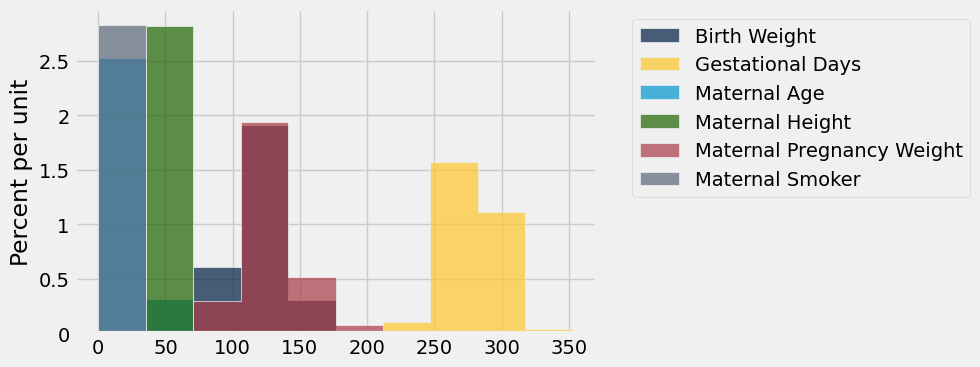

In [28]:
births.hist()

Let's set overlay = False

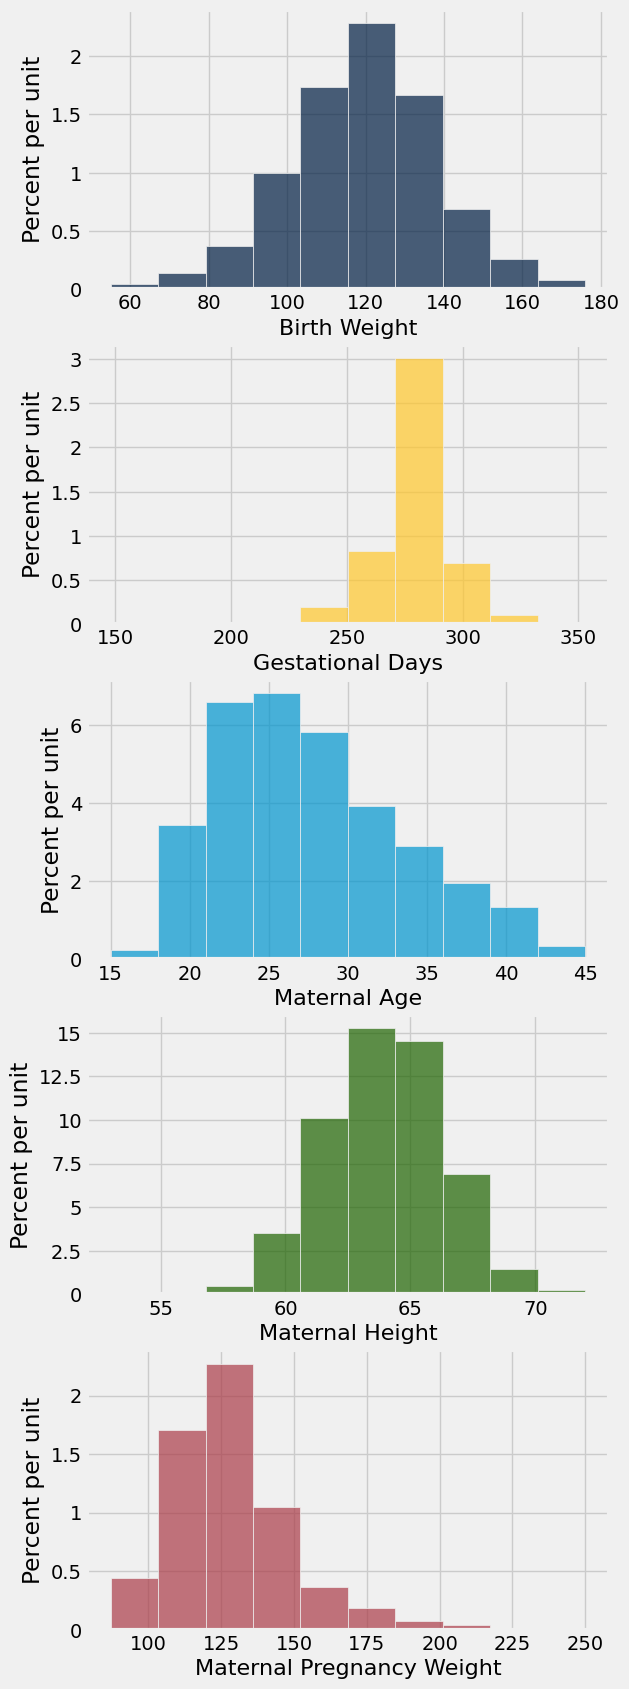

In [29]:
births.drop("Maternal Smoker").hist(overlay = False)

For now, lets look at Maternal Pregnancy Weight

In [30]:
mpw = births.column("Maternal Pregnancy Weight") # Get the column
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280411)

In [31]:
std_lower = mean - (3*sd)
std_upper = mean + (3*sd)

In [32]:
std_lower, std_upper

(66.302356168249062, 190.65505439393155)

Let's find all the examples that are within 3 SDs of the mean:

<details>
<summary>Solution</summary>
  births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))
</details>


In [34]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between_or_equal_to(std_lower, std_upper))
within_3_SDs

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [35]:
within_3_SDs.num_rows

1158

In [36]:
within_3_SDs.num_rows / births.num_rows

0.9863713798977853

Chebyshev's bound tells us that the proportion should be at least


In [37]:
1 - 1/(3**2)

0.8888888888888888

**Question:** What is the proportion within 3 SDs of the mean?

<details>
<summary>Solution</summary>
  within_3_SDs.num_rows / births.num_rows
</details>

Let's see if Chebyshev's bounds work for distributions with various shapes for the different columns

Let's comment the code together before we run it

In [38]:
for feature in births.labels:       # What does this line do?
    values = births.column(feature) # What does this line do?
    mean = np.mean(values) # What does this line do?
    sd = np.std(values) # What does this line do?
    print() # What does this line do?
    print(feature) # What does this line do?
    for z in make_array(2, 3, 4, 5): # What does this line do?
        # What does the line below?
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        # What does the line below?
        proportion = chosen.num_rows / births.num_rows
        # What does the line below?
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

(back to slides)
# Standard Units

Lets create a function where given a list of values called `x`, we want to return a list of standard units.

<details>
<summary>Solution</summary>
  return (x - np.mean(x)) / np.std(x)
</details>

Remember: `z = (value - average)/SD`

In [39]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [40]:
curr_values = make_array(2, 3, 3, 9)
standard_units(curr_values), np.average(curr_values), np.std(curr_values)

(array([-0.81150267, -0.45083482, -0.45083482,  1.71317231]),
 4.25,
 2.7726341266023544)

Let's now convert the values in the `Maternal Age` column in the `births` table to standard units

In [41]:
births.column('Maternal Age')

array([27, 33, 28, ..., 30, 21, 38])

In [42]:
ages = births.column('Maternal Age') # get the column
ages_standard_units = standard_units(ages) # convert the column to standard units 
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

**Question:** What was the original mean and std of the ages?

In [43]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.8153604041908968)

**Question:** What is the new mean and std of the ages?

*Let's answer this before we run the cell below*

In [44]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

Let's put ages and the ages as standard units into a table called `both`

In [45]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


(back to slides) - Question in the slides 

**Question:** What is the  mean and std of the ages?

<details>
<summary>Solution</summary>
  np.mean(ages), np.std(ages)
</details>

In [ ]:
np.mean(ages), np.std(ages)

Let's now plot the histograms of the ages and the ages in standard units

In [ ]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

In [ ]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

(back to slides)
# The SD and Bell Shaped Curves

It's hard to tell the SD from the histogram above.

Instead, lets look at the heights of the mothers.

In [ ]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

**Question:** Where would we guess the average is?

**Question:** Where is the point of inflection?

**Hint Question:** What do we mean by *point of inflection*?

<details>
<summary>Solution</summary>
  start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an "upside-down cup" to a "right-way-up cup"; formally, the curve has a point of inflection. That point is one SD above average. 
</details>


Now let's check the mean and std by running the code below 

In [ ]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

Lets compute the range of 1 STD

In [ ]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

Let's look at another example.

From the above plots, which histograms look like a bell curve?

In [ ]:
# Solution below





















births.hist('Birth Weight') #, bins = np.arange(56.5, 72.6, 1))

**Question:** What's the average and whats the std?

In [ ]:
np.mean(births.column('Birth Weight')), np.std(births.column('Birth Weight'))

(back to slides)
# Correlation

In [ ]:
galton = Table.read_table('galton.csv')
galton.show(5)

Let's make a table that just has the heights

<details>
<summary>Solution</summary>
  'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
</details>

In [ ]:
heights = Table().with_columns(
    ...
    ...
    )
heights

Let's show a scatter plot where MidParent is on the x-axis

In [ ]:
heights.scatter('MidParent')

Now let's predict the child's height based on the average of the parents' height

**Question:** What type of trend do we see?

Let's look at another table

In [ ]:
hybrids = Table.read_table('hybrid.csv')
hybrids.show(5)

**Question:** Is there an association between `acceleration` and `mpg`?

In [ ]:
hybrids.select("mpg", "acceleration").scatter("mpg")

**Question:** What does this plot show?

**Question:** What about `mpg` and price`?

In [ ]:
hybrids.select("msrp", "acceleration").scatter("msrp")

**Question:** Do we see the same trends with standard units?

In [ ]:
# Steps:
# 1. convert each column to their own standard units
# 2. store the standard unit columns
# 3. show a histogram with the standard units